# Build Defensive actions maps

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from mplsoccer.pitch import Pitch
import seaborn as sns
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib as mpl
from scipy import stats

In [3]:
import statsbombpy

In [4]:
from statsbombpy import sb

## Retrieve data for the UCL Final won by Liverpool

In [5]:
events = sb.events(match_id=22912)

credentials were not supplied. open data access only


In [6]:
events.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Tottenham Hotspur,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Liverpool,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Tottenham Hotspur,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:00:00.000,Half Start,NaN


## Filter the columns 

In [7]:
events.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_offensive', 'foul_committed_penalty',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_punched_out', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected

In [8]:
events.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Tottenham Hotspur,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Liverpool,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Tottenham Hotspur,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:00:00.000,Half Start,NaN


### Select only Team, Type, Player, Minute and location columns

In [9]:
events = events[['team','type','player','minute', 'location']].reset_index()

### Select only Liverpool columns

In [10]:
events = events[events['team']=="Liverpool"]

In [11]:
events

,index,team,type,player,minute,location
1,1,Liverpool,Starting XI,NaN,0,NaN
2,2,Liverpool,Half Start,NaN,0,NaN
4,4,Liverpool,Half Start,NaN,45,NaN
6,6,Liverpool,Pass,Jordan Brian Henderson,0,"[61.0, 41.0]"
7,7,Liverpool,Pass,Joël Andre Job Matip,0,"[37.0, 44.9]"
...,...,...,...,...,...,...
3154,3154,Liverpool,Substitution,Roberto Firmino Barbosa de Oliveira,57,NaN
3155,3155,Liverpool,Substitution,Georginio Wijnaldum,61,NaN
3159,3159,Liverpool,Substitution,Sadio Mané,88,NaN
3161,3161,Liverpool,Tactical Shift,NaN,77,NaN


### Take a look at Liverpool players

In [12]:
events['player'].unique()

array([nan, 'Jordan Brian Henderson', 'Joël Andre Job Matip',
       'Fábio Henrique Tavares', 'Virgil van Dijk', 'Georginio Wijnaldum',
       'Sadio Mané', 'Andrew Robertson', 'Trent Alexander-Arnold',
       'Mohamed Salah', 'Alisson Ramsés Becker',
       'Roberto Firmino Barbosa de Oliveira', 'James Philip Milner',
       'Divock Okoth Origi', 'Joe Gomez'], dtype=object)

### Take a look at event types available

In [13]:
events['type'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Duel', 'Pressure', 'Foul Committed', 'Shot', 'Goal Keeper',
       'Clearance', 'Ball Recovery', 'Foul Won', 'Interception',
       'Miscontrol', 'Dispossessed', 'Dribbled Past', 'Dribble', '50/50',
       'Block', 'Shield', 'Injury Stoppage', 'Referee Ball-Drop',
       'Half End', 'Substitution', 'Tactical Shift'], dtype=object)

## Retrieve Salah Pressure, Ball Recovery and interception data

In [14]:
Salah_def_data = events[events['player']=="Mohamed Salah"]

In [15]:
Salah_def_data = Salah_def_data[Salah_def_data["type"].isin(['Pressure','Interception','Ball Recovery'])].reset_index()

In [16]:
Salah_def_data[['x','y']] = Salah_def_data.location.to_list()

C:\Users\jacky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jacky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


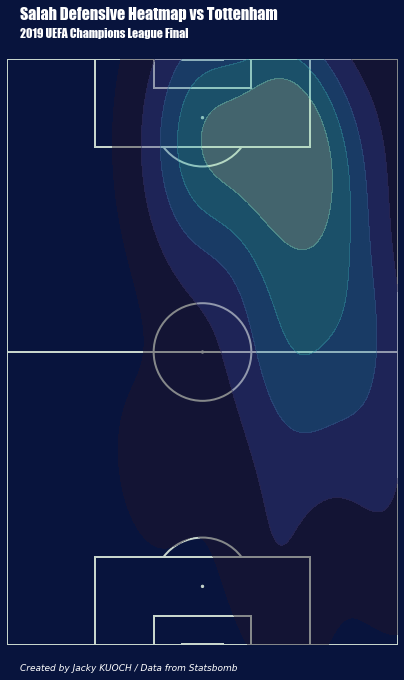

<Figure size 432x288 with 0 Axes>

In [17]:
fig ,ax = plt.subplots(figsize=(7,11))
hfont = {'fontname':'Impact'}

#Set title
fig.text(0.15,0.9, "Salah Defensive Heatmap vs Tottenham\n", fontsize = 16, fontweight = "bold", color = "w", **hfont)
fig.text(0.15,0.9, "2019 UEFA Champions League Final", fontsize = 12, fontweight="regular", color = "w", **hfont)
fig.text(0.15, 0.1, "Created by Jacky KUOCH / Data from Statsbomb",fontstyle="italic",fontsize=9, color="w")

#Change the background color
fig.set_facecolor('#08143D')
ax.patch.set_facecolor('#08143D')

#Parameters of the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='#08143D', line_color='#c7d5cc', figsize=(7, 10.5),
              constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

kde = sns.kdeplot(
    Salah_def_data['y'],
    Salah_def_data['x'],
    shade=True,
    shade_lowest=False,
    alpha = 0.4,
    n_levels = 6,
    cmap="mako"
)

#Set limits for our plot
plt.xlim(0,80)
plt.ylim(0,120)

plt.show()
plt.tight_layout()

## Do the same for Mané

In [18]:
Mane_def_data = events[events['player']=="Sadio Mané"]

In [19]:
Mane_def_data = Mane_def_data[Mane_def_data["type"].isin(['Pressure','Interception','Ball Recovery'])].reset_index()

In [20]:
Mane_def_data[['x','y']] = Mane_def_data.location.to_list()

## Plot Vertical heatmap

C:\Users\jacky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jacky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


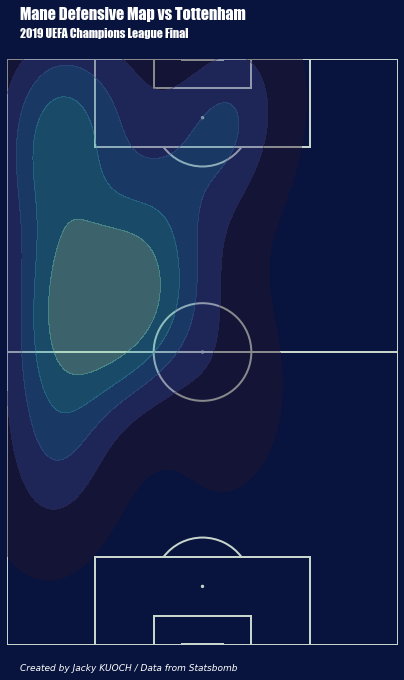

<Figure size 432x288 with 0 Axes>

In [21]:
fig ,ax = plt.subplots(figsize=(7,11))
hfont = {'fontname':'Impact'}

#Set title
fig.text(0.15,0.9, "Mane Defensive Map vs Tottenham\n", fontsize = 16, fontweight = "bold", color = "w", **hfont)
fig.text(0.15,0.9, "2019 UEFA Champions League Final", fontsize = 12, fontweight="regular", color = "w", **hfont)
fig.text(0.15, 0.1, "Created by Jacky KUOCH / Data from Statsbomb",fontstyle="italic",fontsize=9, color="w")

#Change the background color
fig.set_facecolor('#08143D')
ax.patch.set_facecolor('#08143D')

#Parameters of the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='#08143D', line_color='#c7d5cc', figsize=(7, 10.5),
              constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

kde = sns.kdeplot(
    Mane_def_data['y'],
    Mane_def_data['x'],
    shade=True,
    shade_lowest=False,
    alpha = 0.4,
    n_levels = 6,
    cmap="mako"
)

#Set limits for our plot
plt.xlim(0,80)
plt.ylim(0,120)

plt.show()
plt.tight_layout()

## Convex Hulls to see if it's more representative of the data

### Rename players with their "nickname"

In [22]:
#Rename Firmino
events = events.replace(to_replace="Roberto Firmino Barbosa de Oliveira", value = "Roberto Firmino")

In [23]:
#Rename Fabinho
events = events.replace(to_replace="Fábio Henrique Tavares", value = "Fabinho")

In [24]:
# Rename Henderson
events = events.replace(to_replace="Jordan Brian Henderson", value = "Jordan Henderson")

In [25]:
events['player'].unique()

array([nan, 'Jordan Henderson', 'Joël Andre Job Matip', 'Fabinho',
       'Virgil van Dijk', 'Georginio Wijnaldum', 'Sadio Mané',
       'Andrew Robertson', 'Trent Alexander-Arnold', 'Mohamed Salah',
       'Alisson Ramsés Becker', 'Roberto Firmino', 'James Philip Milner',
       'Divock Okoth Origi', 'Joe Gomez'], dtype=object)

### Store defensive data

In [26]:
events = events[events["type"].isin(['Pressure','Interception','Ball Recovery'])].reset_index()

### Select forwards and midfielders

In [27]:
players = ['Sadio Mané','Roberto Firmino','Mohamed Salah','Georginio Wijnaldum', 'Fabinho', 'Jordan Henderson']

In [28]:
events[['x','y']] = events.location.to_list()

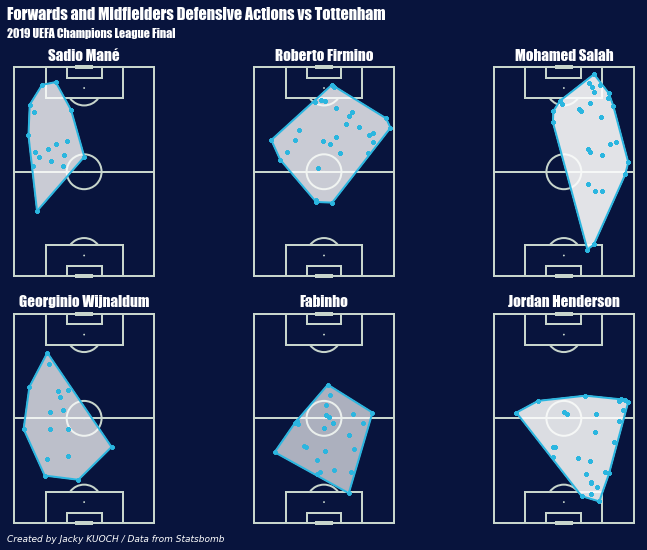

In [34]:
fig, axes = plt.subplots(2,3,figsize=(11,7))
fig.set_facecolor('#08143D')
#axes.flat[-1].set_visible(False)

#Set title
fig.text(0.1,1, "Forwards and Midfielders Defensive Actions vs Tottenham\n", fontsize = 16, fontweight = "bold", color = "w", **hfont)
fig.text(0.1,1, "2019 UEFA Champions League Final", fontsize = 12, fontweight="regular", color = "w", **hfont)
fig.text(0.1, 0, "Created by Jacky KUOCH / Data from Statsbomb",fontstyle="italic",fontsize=9, color="w")

pitch = Pitch(pitch_type='statsbomb', orientation='vertical',
            pitch_color='#08143D', line_color='#c7d5cc', figsize=(7, 11),
              constrained_layout=False, tight_layout=True)

for i,ax in enumerate(fig.axes):
    try:
        ax.set_facecolor('#08143D')
        pitch.draw(ax=ax)

        df = events[(events.player == players[i])]
        df = df[(np.abs(stats.zscore(df[['x','y']])) < 0.8)]

        points = df[['y','x']].values
        hull = ConvexHull(df[['x','y']])

        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], "#2bb6e0",lw=2)
            ax.fill(points[hull.vertices,0], points[hull.vertices,1], c='white', alpha=0.2, zorder=1)
            ax.set_ylabel(ylabel=' ')
            ax.scatter(df.y,df.x, color ="#2bb6e0",s=10, zorder=2)

        ax.set_title(label=players[i],c='white',va='center',ha='center',fontsize=15,**hfont)

    except:
        pass

plt.tight_layout()

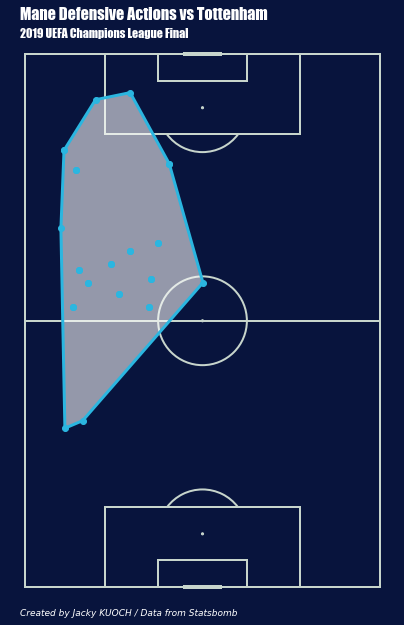

<Figure size 432x288 with 0 Axes>

In [30]:
fig ,ax = plt.subplots(figsize=(7,11))
hfont = {'fontname':'Impact'}

#Set title
fig.text(0.15,0.86, "Mane Defensive Actions vs Tottenham\n", fontsize = 16, fontweight = "bold", color = "w", **hfont)
fig.text(0.15,0.86, "2019 UEFA Champions League Final", fontsize = 12, fontweight="regular", color = "w", **hfont)
fig.text(0.15, 0.13, "Created by Jacky KUOCH / Data from Statsbomb",fontstyle="italic",fontsize=9, color="w")

#Change the background color
fig.set_facecolor('#08143D')
ax.patch.set_facecolor('#08143D')

#Parameters of the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='#08143D', line_color='#c7d5cc', figsize=(7, 10.5),
              constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)
#plt.gca().invert_yaxis()

df = Mane_def_data
df = df [(np.abs(stats.zscore(df[['y','x']])) < 1)]

points = df[['y','x']].values

hull = ConvexHull(df[['y','x']])

plt.scatter(df.y,df.x, color ="#2bb6e0", zorder=2)

for i in hull.simplices:
    #Draw a black line between each
    plt.plot(points[i, 0], points[i, 1], '#2bb6e0',lw=3)
    plt.fill(points[hull.vertices,0], points[hull.vertices,1], c='white', alpha=0.1, zorder=1)

plt.show()
plt.tight_layout()